In [ ]:
# =========================================================
# INSTALL LIBRARIES
# =========================================================
!pip install xgboost lightgbm --quiet

# =========================================================
# IMPORTS
# =========================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [ ]:
# Load the CSV into df
df = pd.read_csv("mainshock_labeled_clean_data.csv")

df.head()


,latitude,longitude,depth,nst,gap,dmin,rms,mag_in_mw,month,day,dayofweek,hour,minute,second,time_since_prev_quake,days_since_prev_quake,is_mainshock
0,-4.610,153.176,35.0,-608.559724,2877.084524,19.646499,13.237037,6.5,1,18,5,7,4,2,0.0,0.000000,1
1,51.389,179.824,25.0,-715.562304,3334.704429,21.525369,14.764444,6.4,2,2,6,14,56,2,1324320.0,15.327778,1
2,-21.871,-175.099,35.0,173.404604,-41.541991,-0.951327,-1.845603,6.4,2,14,4,20,41,15,1057513.0,12.239734,1
3,-33.292,-178.005,15.0,182.403831,0.331234,-0.602494,-1.790864,6.3,3,6,3,15,35,7,1709632.0,19.787407,1
4,-7.738,125.808,10.0,-553.268056,2863.375434,19.116453,12.437991,7.0,3,26,2,7,12,8,1697821.0,19.650706,1


In [ ]:
target = "is_mainshock"

X = df.drop(columns=[target])
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
# XGBoost
model_xgb = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)
model_xgb.fit(X_train, y_train)

# LightGBM
model_lgb = LGBMClassifier(random_state=42, verbose=-1)
model_lgb.fit(X_train, y_train)


LGBMClassifier(random_state=42, verbose=-1)

In [ ]:
pred_xgb = model_xgb.predict(X_test)
pred_lgb = model_lgb.predict(X_test)

print("===== XGBOOST REPORT =====")
print(classification_report(y_test, pred_xgb))

print("\n===== LIGHTGBM REPORT =====")
print(classification_report(y_test, pred_lgb))


===== XGBOOST REPORT =====
              precision    recall  f1-score   support

           0       0.77      0.67      0.72     36893
           1       0.78      0.86      0.82     51564

    accuracy                           0.78     88457
   macro avg       0.78      0.76      0.77     88457
weighted avg       0.78      0.78      0.78     88457


===== LIGHTGBM REPORT =====
              precision    recall  f1-score   support

           0       0.76      0.63      0.69     36893
           1       0.76      0.86      0.81     51564

    accuracy                           0.76     88457
   macro avg       0.76      0.74      0.75     88457
weighted avg       0.76      0.76      0.76     88457



HeatMap [Afia]

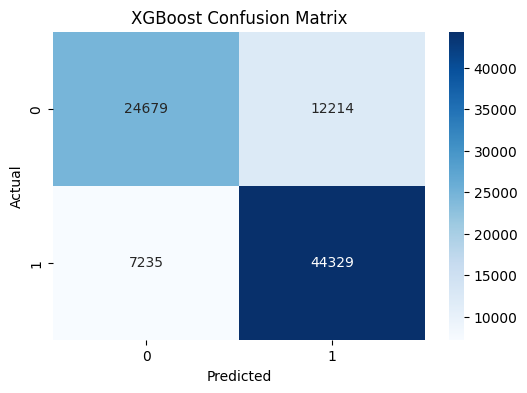

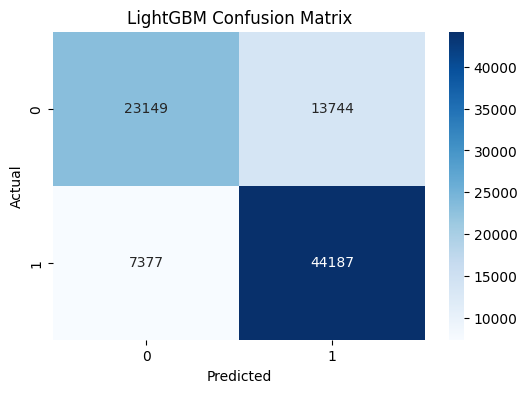

In [ ]:
def show_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

show_cm(y_test, pred_xgb, "XGBoost Confusion Matrix")
show_cm(y_test, pred_lgb, "LightGBM Confusion Matrix")


In [ ]:
xgb_cm = confusion_matrix(y_test, pred_xgb)

print('XGBoost Confusion Matrix')
print(xgb_cm)

lgb_cm = confusion_matrix(y_test, pred_lgb)
print('LGBoost Confusion Matrix')
print(xgb_cm)

XGBoost Confusion Matrix
[[24679 12214]
 [ 7235 44329]]
LGBoost Confusion Matrix
[[24679 12214]
 [ 7235 44329]]


ROC-AUC [Afia]

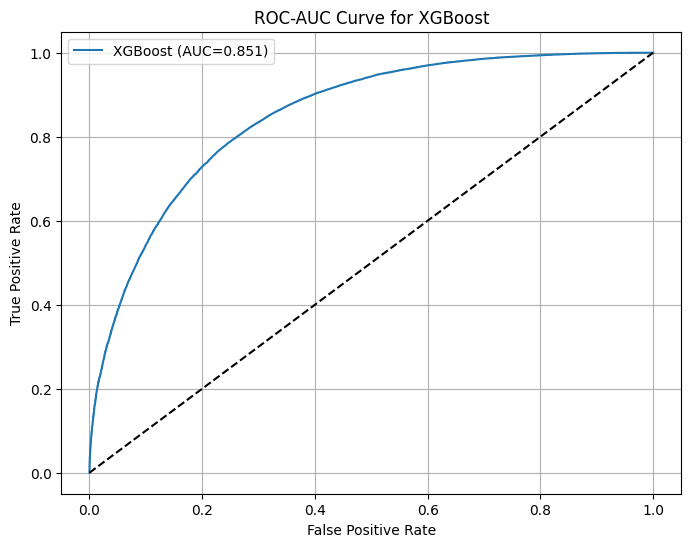

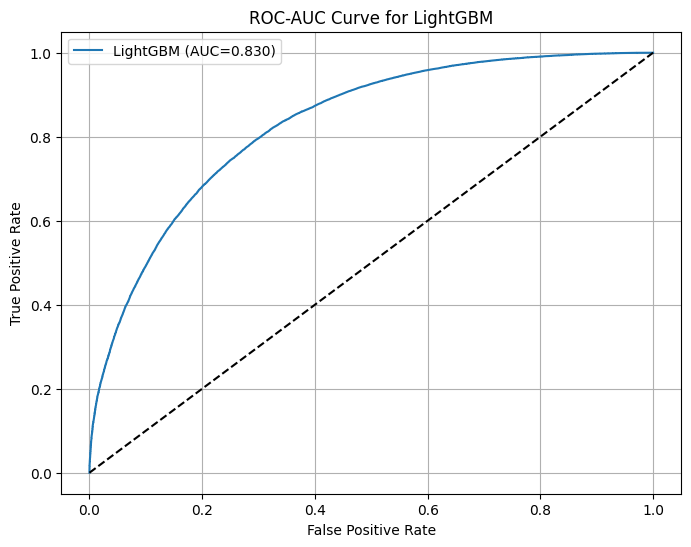

In [ ]:
# -----------------------------
# XGBoost ROC Plot
# -----------------------------
plt.figure(figsize=(8,6))

y_prob_xgb = model_xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")
plt.plot([0,1], [0,1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for XGBoost")
plt.legend()
plt.grid()
plt.show()


# -----------------------------
# LightGBM ROC Plot
# -----------------------------
plt.figure(figsize=(8,6))

y_prob_lgb = model_lgb.predict_proba(X_test)[:, 1]
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
auc_lgb = auc(fpr_lgb, tpr_lgb)

plt.plot(fpr_lgb, tpr_lgb, label=f"LightGBM (AUC={auc_lgb:.3f})")
plt.plot([0,1], [0,1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-AUC Curve for LightGBM")
plt.legend()
plt.grid()
plt.show()


PCA CLUSTER VISUALIZATION (2‑D) [Afia]


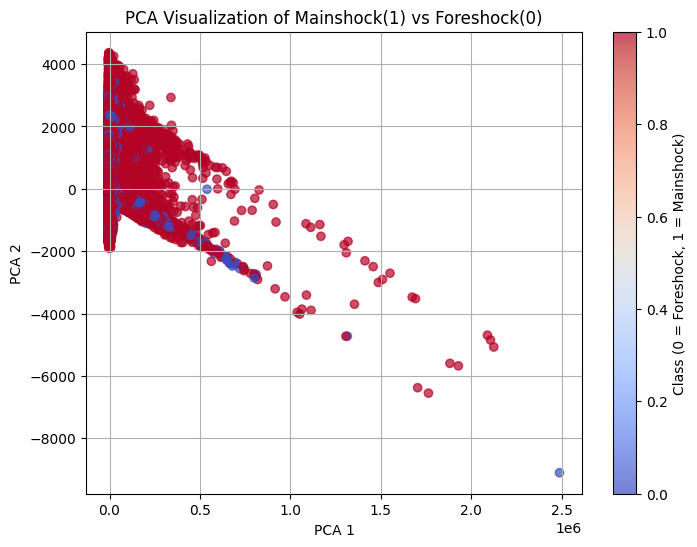

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

target = "is_mainshock"

X = df.drop(columns=[target])
y = df[target]

# PCA to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(
    pca_result[:,0], pca_result[:,1],
    c=y, cmap="coolwarm", alpha=0.7
)
plt.title("PCA Visualization of Mainshock(1) vs Foreshock(0)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Class (0 = Foreshock, 1 = Mainshock)")
plt.grid(True)
plt.show()


t‑SNE Visualization (More realistic cluster separation)---------NOt used____ DUe to time constraints


# SHAP [Simanto]

In [ ]:
import shap


In [ ]:
# Take a random sample (adjust size if needed)
X_sample = X_test.sample(n=10000, random_state=42)


In [ ]:
explainer = shap.TreeExplainer(
    model_xgb,
    feature_perturbation="tree_path_dependent"
)

shap_values = explainer.shap_values(X_sample)


In [ ]:
# 3. Compute mean(|SHAP|)
shap_importance = pd.DataFrame({
    "feature": X_sample.columns,
    "mean_abs_shap": np.abs(shap_values).mean(axis=0)
}).sort_values("mean_abs_shap", ascending=False)

shap_importance

,feature,mean_abs_shap
7,mag_in_mw,0.893847
0,latitude,0.360179
1,longitude,0.336789
2,depth,0.259718
14,time_since_prev_quake,0.130683
3,nst,0.115168
4,gap,0.096080
5,dmin,0.093909
6,rms,0.093703
8,month,0.056810


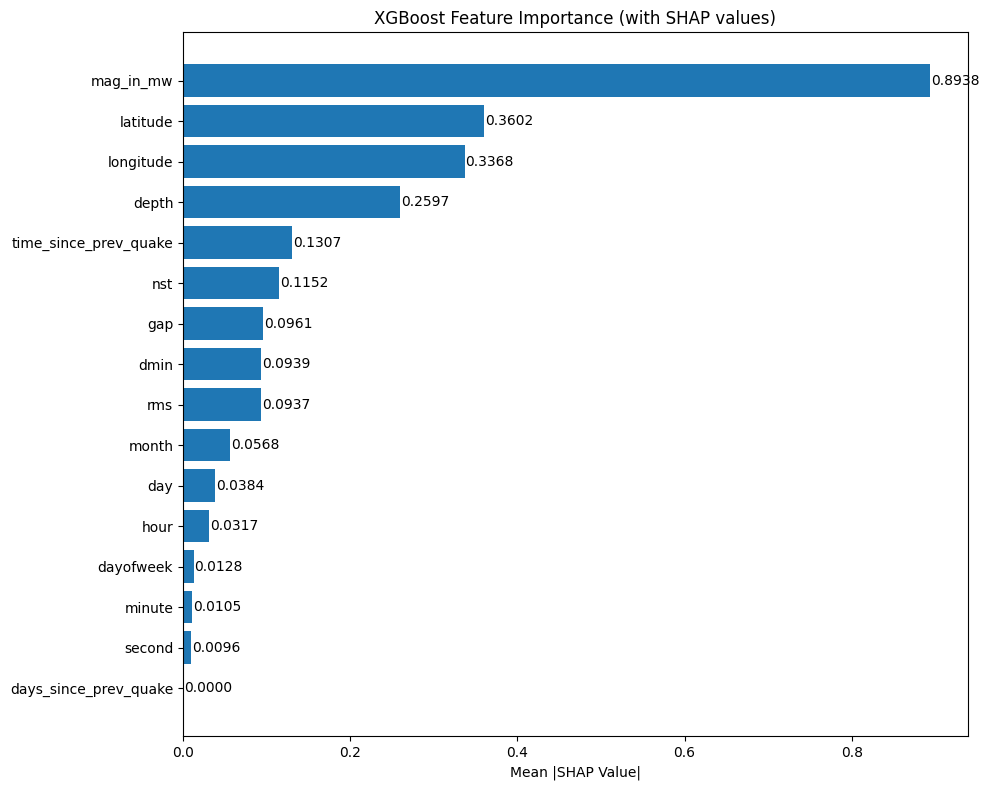

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.barh(shap_importance["feature"], shap_importance["mean_abs_shap"])
plt.xlabel("Mean |SHAP Value|")
plt.title("XGBoost Feature Importance (with SHAP values)")

# Add numerical values on bars
for i, v in enumerate(shap_importance["mean_abs_shap"]):
    plt.text(v + 0.001, i, f"{v:.4f}", va='center')

plt.gca().invert_yaxis()  # highest at top
plt.tight_layout()
plt.show()
